#Task 1

Access data from google drive and split into testing and training sets

In [18]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import requests
import tarfile
import shutil
import datetime
!pip install -U tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.14.0)


In [2]:
# mount google drive for access
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Create target directory if doesn't exist

dirName = '/content/drive/My Drive/Assignment3_Lewis/'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")

%cd /content/drive/My Drive/Assignment3_Lewis

Directory  /content/drive/My Drive/Assignment3_Lewis/  Created 
/content/drive/My Drive/Assignment3_Lewis


In [0]:
# download all of the photos to project folder if they're not there already
if not os.path.exists('/content/drive/My Drive/Assignment3_Lewis/flower_photos'):
    url = 'https://goo.gl/EgJVXZ'     # link to flower file
    myfile = requests.get(url)        # save url request in myfile
    open('/content/drive/My Drive/Assignment3_Lewis/flowers.tar', 'wb').write(myfile.content) # write contents at url 
    tarf = tarfile.open('/content/drive/My Drive/Assignment3_Lewis/flowers.tar')      #open tar file
    tarf.extractall()     # extract to local dir

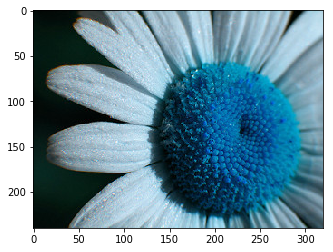

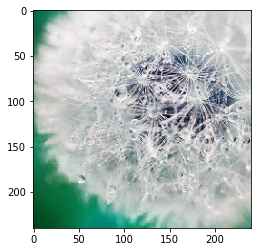

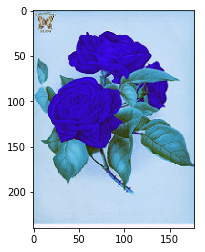

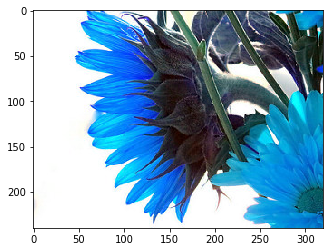

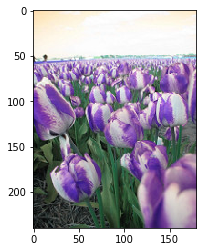

In [5]:
# Test to see if download 
# define the filepath to the data folder
DATADIR = '/content/drive/My Drive/Assignment3_Lewis/flower_photos/'

# create a list with folder names which contain the different flowers
CATEGORIES = ['daisy', 'dandelion', "roses", 'sunflowers', 'tulips']


# print the first image from each file
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to flower folders
    for img in os.listdir(path):  # iterate over each image per flower type
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!
        break


In [6]:
# Split data from files in flower_photos folder

# specify how many photos from each category will be used for validation
validation_imgs = 50

# specify how many photos from each category will be used for testing
test_imgs = 50

# create the file paths to each of the sets and their categories
sets = ['validation', 'test', 'train']
categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
basedir = "/content/drive/My Drive/Assignment3_Lewis"
for setID in sets:
    testpath = basedir + '/' + setID
    if not os.path.exists(testpath):  # create new directory if doesn't exist
            os.mkdir(testpath)        
    else:
            shutil.rmtree(testpath)   # else clear it of previous contents
    for category in categories:
        print(category)
        testpath = basedir + '/' + setID + '/' + category
        if not os.path.exists(testpath):
            os.mkdir(testpath)

                       

########## add flowers to their respective validation/testing/training folders

# set current path to the daisy folder
basepath = '/content/drive/My Drive/Assignment3_Lewis/flower_photos/'

for category in categories:
  
    path = basepath + category
    # init current number of imgs in this category being used for test/val to 0
    current_val_imgs = 0
    current_test_imgs = 0

    for img in tqdm(os.listdir(path)):  # iterate over each image in each flower folder
        basedir = '/content/drive/My Drive/Assignment3_Lewis/'
        if current_val_imgs < validation_imgs:
            currentpath = basedir + 'validation/' + category
            current_val_imgs += 1
        elif current_test_imgs < test_imgs:
            currentpath = basedir + 'test/' + category
            current_test_imgs += 1
        else:
            currentpath = basedir + 'train/' + category
        
        # add flower picture into a training testing or validation folder
        if not os.path.exists(os.path.join(currentpath,img)):
            shutil.copy(os.path.join(path,img), os.path.join(currentpath,img))


  3%|▎         | 17/633 [00:00<00:03, 160.21it/s]

daisy
dandelion
roses
sunflowers
tulips
daisy
dandelion
roses
sunflowers
tulips
daisy
dandelion
roses
sunflowers
tulips


100%|██████████| 799/799 [00:05<00:00, 152.44it/s]


#Task 2 
Create a CNN using keras flow_from_directory and .fit_generator

In [7]:
# target dimension of images for normalization
img_width = 256
img_height = 256

# pixel scaling for easier optimization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/train',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)


# validation generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/validation',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)

# test generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/test',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)

# create a new sequential model
model = Sequential()

# begin adding layers to model
model.add(Conv2D(64, (3, 3), strides=2, activation="relu", input_shape=(img_width, img_height, 3))) # add conv layer
model.add(Dropout(0.3))  # remove influence of random neurons for regularization
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))  # add pooling layer to get most important features
model.add(Dropout(0.3))  # remove influence of random neurons for regularization

model.add(Conv2D(64, (3, 3), strides=2, activation="relu"))  # add conv layer
model.add(Dropout(0.3))  # remove influence of random neurons for regularization
model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))  # add pooling layer to get most important features
model.add(Dropout(0.3))  # remove influence of random neurons for regularization

model.add(Flatten())  # convert 3d to 1d

model.add(Dense(64, activation="relu"))  # add dense layer
model.add(Dropout(0.3))  # remove influence of random neurons for regularization

model.add(Dense(5, activation="softmax"))  # output layer with softmax activation because multiclass classification

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# create directory to store best model
modeldir ='/content/drive/My Drive/Assignment3_Lewis/model/'
if not os.path.exists(modeldir):
    os.mkdir('/content/drive/My Drive/Assignment3_Lewis/model/')

    
# a checkpoint callback which will save model with best validation accuracy
checkpoint = ModelCheckpoint('/content/drive/My Drive/Assignment3_Lewis/model/model1_best_acc.hdf5',
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

# an early stopping callback which will stop the model if validation loss does not improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  verbose=1, 
                                                  mode='auto', 
                                                  min_delta=.02,
                                                  patience=2
                                                 )

# add both callbacks to list
callbacks_list = [checkpoint, early_stopping]

# train the model using the train_generator 
history = model.fit_generator(train_generator,
                              steps_per_epoch=150,
                              epochs=20,
                              verbose=1,
                              callbacks=callbacks_list,
                              validation_data=validation_generator,
                              validation_steps=12,
                              shuffle=True)



Found 3170 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


W0622 01:37:55.505341 139791671334784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/20
149/150 [============================>.] - ETA: 0s - loss: 1.3878 - acc: 0.3895
Epoch 00001: val_acc improved from -inf to 0.46825, saving model to /content/drive/My Drive/Assignment3_Lewis/model/model1_best_acc.hdf5
150/150 [==============================] - 30s 203ms/step - loss: 1.3859 - acc: 0.3901 - val_loss: 1.2608 - val_acc: 0.4683
Epoch 2/20
149/150 [============================>.] - ETA: 0s - loss: 1.1203 - acc: 0.5458
Epoch 00002: val_acc improved from 0.46825 to 0.57407, saving model to /content/drive/My Drive/Assignment3_Lewis/model/model1_best_acc.hdf5
150/150 [==============================] - 26s 175ms/step - loss: 1.1190 - acc: 0.5461 - val_loss: 1.1231 - val_acc: 0.5741
Epoch 3/20
149/150 [============================>.] - ETA: 0s - loss: 1.0503 - acc: 0.5680
Epoch 00003: val_acc did not improve from 0.57407
150/150 [==============================] - 25s 168ms/step - loss: 1.0509 - acc: 0.5681 - val_loss: 1.1172 - val_acc: 0.5608
Epoch 4/20
149/150 [========

8/8 [==============================] - 1s 118ms/step - loss: 0.7506 - acc: 0.7040


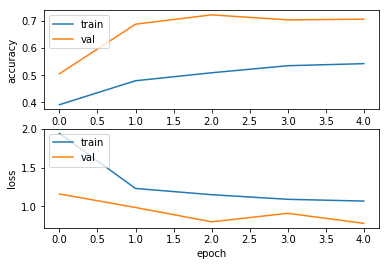

Test loss:  0.7505900040268898
Test accuracy:  0.704


In [23]:
# load the best model
model = tf.keras.models.load_model('/content/drive/My Drive/Assignment3_Lewis/model/model1_best_acc.hdf5')


# store results of evaluation
test_loss, test_accuracy = model.evaluate(test_generator)

# loss and accuracy for first model
plt.figure()
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])    
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  

# Print out loss and accuracy for testing data set on first model
print("Test loss: ", test_loss)
print("Test accuracy: ", test_accuracy)

#Task 3

Use an existing model and apply transfer learning and train new model


In [0]:
# import some libraries
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras import backend as k 

In [10]:
# target dimension of images for normalization
img_width = 256
img_height = 256

# download the weights from the VGG19 model and remove the top layers
base_model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

# specify how many layers you want to freeze
freeze_num = 0

# Freeze layers to retain their previous learning
for layer in base_model.layers[:len(base_model.layers)-freeze_num-1]:
    layer.trainable = False

# print current model
base_model.summary()

80142336/80134624 [==============================] - 7s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

In [11]:

# pixel scaling for easier optimization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/train',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)


# validation generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/validation',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)

# test generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/test',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)

#Adding custom Layers 
model = base_model.output
model = Flatten()(model)  # convert 3d to 1d

model = Dense(512, activation="relu")(model) # add dense layer
model = Dropout(0.5)(model)  # remove influence of random neurons for regularization

model = Dense(256, activation="relu")(model)  # add dense layer
model = Dropout(0.5)(model)  # remove influence of random neuron

final = Dense(5, activation="softmax")(model)  # output layer

# merge models together with VGG19 as the input model and added layers as output model
model = tf.keras.models.Model(inputs=base_model.input, outputs=final)
model.summary()


# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modeldir ='/content/drive/My Drive/Assignment3_Lewis/model/'

if not os.path.exists(modeldir):
    os.mkdir('/content/drive/My Drive/Assignment3_Lewis/model/')



# a checkpoint callback which will save model with best validation accuracy
checkpoint = ModelCheckpoint('/content/drive/My Drive/Assignment3_Lewis/model/model2_best_acc.hdf5',monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# an early stopping callback which will stop the model if validation loss does not improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  verbose=1, 
                                                  mode='auto', 
                                                  min_delta=.02,
                                                  patience=2
                                                 )

# add both callbacks to list
callbacks_list = [checkpoint, early_stopping]

history = model.fit_generator(train_generator,
                              steps_per_epoch=150,
                              epochs=20,
                              verbose=1,
                              callbacks=callbacks_list,
                              validation_data=validation_generator,
                              validation_steps=12,
                              shuffle=True)

Found 3170 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
___

8/8 [==============================] - 2s 277ms/step - loss: 0.4796 - acc: 0.8400


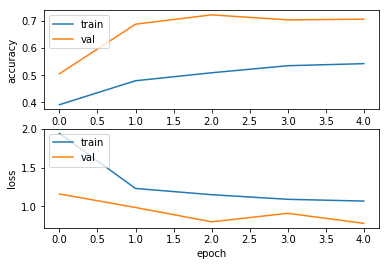

Test loss:  0.4796198792755604
Test accuracy:  0.84


In [24]:
# load the best model
model = tf.keras.models.load_model('/content/drive/My Drive/Assignment3_Lewis/model/model2_best_acc.hdf5')

# store results of evaluation
test_loss, test_accuracy = model.evaluate(test_generator)

# loss and accuracy for first model
plt.figure()
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])    
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  

# Print out loss and accuracy for testing data set on first model
print("Test loss: ", test_loss)
print("Test accuracy: ", test_accuracy)

#Task 4
Apply data augmentation to the training sets and retrain transfer-learned model

In [0]:
# import some libraries
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras import backend as k 

In [0]:
# target dimension of images for normalization
img_width = 256
img_height = 256

# download the weights from the VGG19 model and remove the top layers
base_model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

# specify how many layers you want to freeze
freeze_num = 0

# Freeze layers to retain their previous learning
for layer in base_model.layers[:len(base_model.layers)-freeze_num-1]:
    layer.trainable = False


In [30]:

# pixel scaling for easier optimization using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)


# apply data augmentations to data for greater variety of training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip = True,
        zoom_range = 0.05,
        width_shift_range = 0.1,
        shear_range=0.1,
        height_shift_range=0.05,
        rotation_range=20)


# train generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/train',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)


# validation generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/validation',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)

# test generator to grab photos from training folder, resizes them, creats batches, labels, and shuffles
test_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Assignment3_Lewis/test',
        color_mode="rgb",
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode="categorical",
        shuffle=True)

#Adding custom Layers 
model = base_model.output
model = Flatten()(model)  # convert 3d to 1d

model = Dense(512, activation="relu")(model) # add dense layer
model = Dropout(0.5)(model)  # remove influence of random neurons for regularization

model = Dense(256, activation="relu")(model)  # add dense layer
model = Dropout(0.5)(model)  # remove influence of random neuron

final = Dense(5, activation="softmax")(model)  # output layer

# merge models together with VGG19 as the input model and added layers as output model
model = tf.keras.models.Model(inputs=base_model.input, outputs=final)
model.summary()


# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modeldir ='/content/drive/My Drive/Assignment3_Lewis/model/'

if not os.path.exists(modeldir):
    os.mkdir('/content/drive/My Drive/Assignment3_Lewis/model/')



# a checkpoint callback which will save model with best validation accuracy
checkpoint = ModelCheckpoint('/content/drive/My Drive/Assignment3_Lewis/model/model3_best_acc.hdf5',monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# an early stopping callback which will stop the model if validation loss does not improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  verbose=1, 
                                                  mode='auto', 
                                                  min_delta=.02,
                                                  patience=4
                                                 )

# add both callbacks to list
callbacks_list = [checkpoint, early_stopping]

history = model.fit_generator(train_generator,
                              steps_per_epoch=150,
                              epochs=20,
                              verbose=1,
                              callbacks=callbacks_list,
                              validation_data=validation_generator,
                              validation_steps=12,
                              shuffle=True)

Found 3170 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_

8/8 [==============================] - 2s 306ms/step - loss: 0.7544 - acc: 0.7360


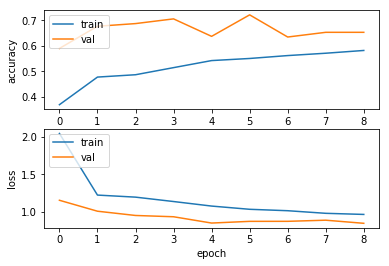

Test loss:  0.7543958351016045
Test accuracy:  0.736


In [32]:
# load the best model
model = tf.keras.models.load_model('/content/drive/My Drive/Assignment3_Lewis/model/model3_best_acc.hdf5')

# store results of evaluation
test_loss, test_accuracy = model.evaluate(test_generator)

# loss and accuracy for first model
plt.figure()
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])    
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  

# Print out loss and accuracy for testing data set on first model
print("Test loss: ", test_loss)
print("Test accuracy: ", test_accuracy)